# Adding Dependences

In [25]:
using DelimitedFiles
using Images
using Plots

# Extract Matrix From Image

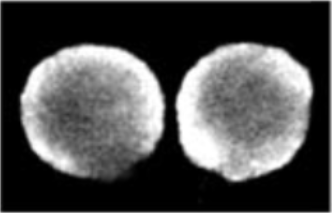

In [40]:
img = load("1.png")

## Extracting the grayscale on the image

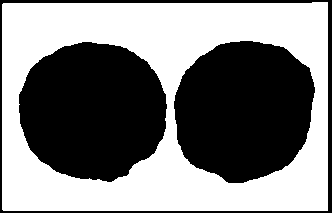

In [46]:
img_channel = Gray.(.!(Gray.(img) .> 0.1))
# img_channel =Gray.(Gray_img)

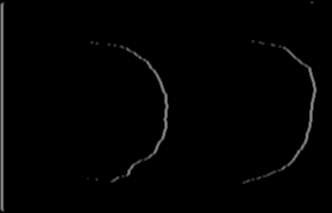

In [51]:
krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
grad_h = imfilter(img_channel, krnl_h')

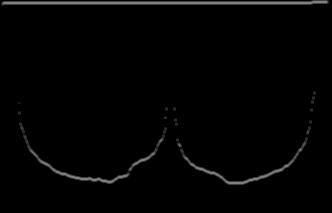

In [52]:
krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
grad_v = imfilter(img_channel, krnl_v')

# Extracting the Contour on the image

In [94]:
# reduce = 10
# Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
# Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
# Gray.(Gray_img_contour)

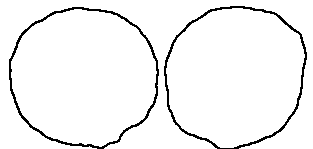

In [113]:
reduce = [35,30,10,10] # [up,down,left,right]
final_img = (grad_h.^2) .+ (grad_v.^2)
final_img = Gray.(.!(Gray.(final_img) .> 0.1))
final_img = final_img[reduce[1]:size(final_img)[1]-reduce[2],reduce[3]:size(final_img)[2]-reduce[4]]

# Extracting the index of each point

In [96]:
# idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
# arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

In [114]:
idx = CartesianIndices(size(final_img))[final_img .== 0]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

2168×2 Matrix{Int64}:
  10  60
  10  61
  10  62
  10  63
  10  64
  10  65
  10  66
  10  67
  10  68
  10  69
   ⋮  
 306  65
 307  53
 307  54
 307  55
 307  56
 307  57
 307  58
 307  59
 307  60

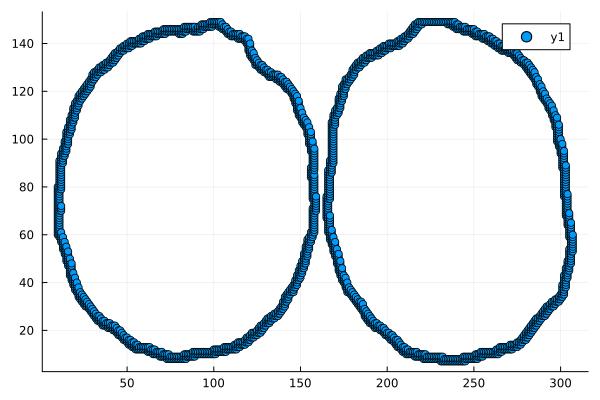

In [115]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

In [116]:
final_img

213×332 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 ⋮              ⋮              ⋮        ⋱  ⋮              ⋮              ⋮  
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1  …  1  

In [117]:
center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

1×2 Matrix{Float64}:
 163.413  104.168

# Putting the index in the center of mass

In [118]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

2168×2 Matrix{Float64}:
 -153.413  -44.1676
 -153.413  -43.1676
 -153.413  -42.1676
 -153.413  -41.1676
 -153.413  -40.1676
 -153.413  -39.1676
 -153.413  -38.1676
 -153.413  -37.1676
 -153.413  -36.1676
 -153.413  -35.1676
    ⋮      
  142.587  -39.1676
  143.587  -51.1676
  143.587  -50.1676
  143.587  -49.1676
  143.587  -48.1676
  143.587  -47.1676
  143.587  -46.1676
  143.587  -45.1676
  143.587  -44.1676

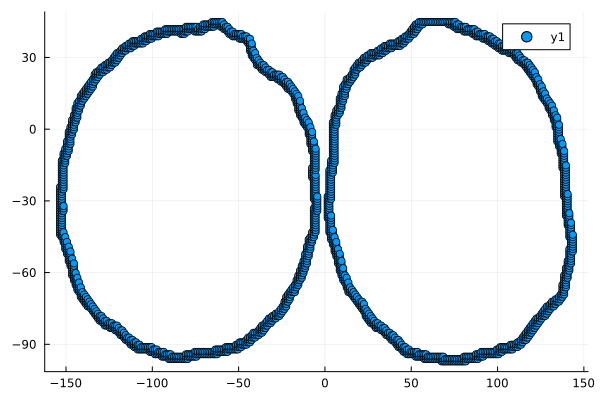

In [119]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [103]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

2186×2 Matrix{Float64}:
 277.122  154.605
 276.754  154.485
 276.385  154.37
 276.016  154.262
 275.646  154.16
 275.276  154.065
 274.906  153.977
 274.535  153.894
 274.163  153.818
 273.792  153.749
   ⋮      
 264.326  143.29
 259.672  145.952
 260.058  145.776
 260.446  145.607
 260.834  145.444
 261.224  145.289
 261.614  145.139
 262.005  144.997
 262.396  144.861

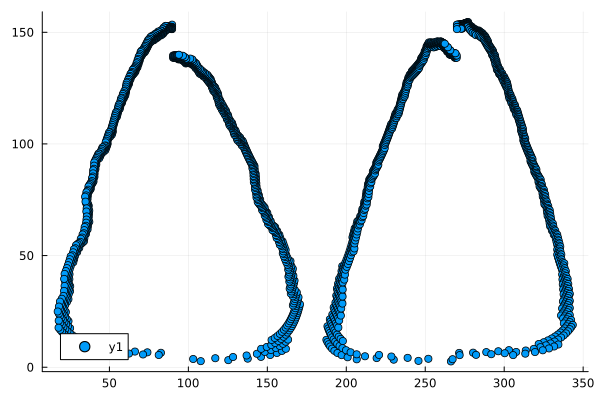

In [104]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)

In [105]:
findmin(center_idx_cil_coord[:,1])

(17.27711043854994, 1028)

In [106]:
findmax(center_idx_cil_coord[:,1])

(343.41004701629646, 1067)